In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
##import tensorflow as tf
import datetime
import re
import matplotlib.pyplot as plt

In [2]:
############## Train Images #######################
path=r'C:\Users\Amber Qian\Downloads\Data_Science_4\Group\17810_23812_bundle_archive\chest_xray\train\PNEUMONIA'

pneunmonia_imgs=os.listdir(path)


path_normal=r'C:\Users\Amber Qian\Downloads\Data_Science_4\Group\17810_23812_bundle_archive\chest_xray\train\NORMAL'

normal_imgs=os.listdir(path_normal)

############# Test Images #########################
path_val=r'C:\Users\Amber Qian\Downloads\Data_Science_4\Group\17810_23812_bundle_archive\chest_xray\val\PNEUMONIA'

pneunmonia_imgs_val=os.listdir(path_val)


path_normal_val=r'C:\Users\Amber Qian\Downloads\Data_Science_4\Group\17810_23812_bundle_archive\chest_xray\val\NORMAL'

normal_imgs_val=os.listdir(path_normal_val)

############# Val Images ##########################
path_test=r'C:\Users\Amber Qian\Downloads\Data_Science_4\Group\17810_23812_bundle_archive\chest_xray\test\PNEUMONIA'

pneunmonia_imgs_test=os.listdir(path_test)


path_normal_test=r'C:\Users\Amber Qian\Downloads\Data_Science_4\Group\17810_23812_bundle_archive\chest_xray\test\NORMAL'

normal_imgs_test=os.listdir(path_normal_test)

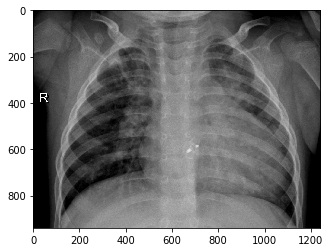

In [3]:
width = 256
height = 256

###### 1 = Gray, 0 = Color, -1 = unchanged #####
type_of_color = 1

test = cv2.imread(path + '/' +pneunmonia_imgs[3],type_of_color)
plt.imshow(test)
plt.show()


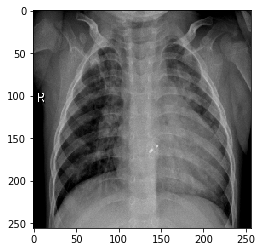

In [4]:
resize = cv2.resize(test, (width,height))
plt.imshow(resize)
plt.show()

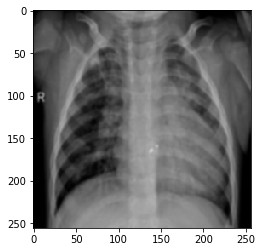

In [5]:
blur = cv2.GaussianBlur(resize, (5, 5), 0)
plt.imshow(blur)
plt.show()

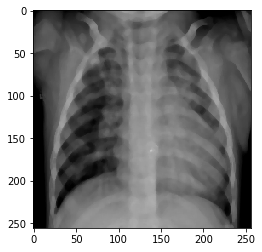

In [6]:
test_Mblur = cv2.medianBlur(resize, 5)
plt.imshow(test_Mblur)
plt.show()

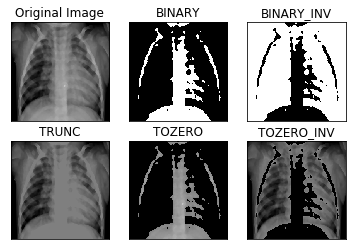

In [7]:
ret,thresh1 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(test_Mblur,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [test_Mblur, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [8]:
################# Train Images ###################
normaldf = []
for i in range (len(normal_imgs)):
    read_n_train = cv2.imread(path_normal + '/' +normal_imgs[i],type_of_color)
    resize_n_train = cv2.resize(read_n_train, (width,height))
    blur_n_train = cv2.medianBlur(resize_n_train, 5)
    normaldf.append(blur_n_train)
    
pneumoniadf = []
for i in range (len(pneunmonia_imgs)):
    read_p_train = cv2.imread(path + '/' +pneunmonia_imgs[i],type_of_color)
    resize_p_train = cv2.resize(read_p_train, (width,height))
    blur_p_train = cv2.medianBlur(resize_p_train, 5)
    pneumoniadf.append(blur_p_train)

################# Test Images ###################

normaldf_test = []
for i in range (len(normal_imgs_test)):
    read_n_test = cv2.imread(path_normal_test + '/' +normal_imgs_test[i],type_of_color)
    resize_n_test = cv2.resize(read_n_test, (width,height))
    blur_n_test = cv2.medianBlur(resize_n_test, 5)
    normaldf_test.append(blur_n_test)
    
pneumoniadf_test = []
for i in range (len(pneunmonia_imgs_test)):
    read_p_test = cv2.imread(path_test + '/' +pneunmonia_imgs_test[i],type_of_color)
    resize_p_test = cv2.resize(read_p_test, (width,height))
    blur_p_test = cv2.medianBlur(resize_p_test, 5)
    pneumoniadf_test.append(blur_p_test)
    
    
################# Val Images ###################
normaldf_val = []
for i in range (len(normal_imgs_val)):
    read_n_val = cv2.imread(path_normal_val + '/' +normal_imgs_val[i],type_of_color)
    resize_n_val = cv2.resize(read_n_val, (width,height))
    blur_n_val = cv2.medianBlur(resize_n_val, 5)
    normaldf_val.append(blur_n_val)
    
pneumoniadf_val = []
for i in range (len(pneunmonia_imgs_val)):
    read_p_val = cv2.imread(path_val + '/' +pneunmonia_imgs_val[i],type_of_color)
    resize_p_val = cv2.resize(read_p_val, (width,height))
    blur_p_val = cv2.medianBlur(resize_p_val, 5)
    pneumoniadf_val.append(blur_p_val)

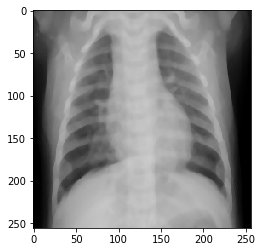

In [9]:
plt.imshow(pneumoniadf[1])
plt.show()

In [10]:
from PIL import Image

In [11]:
train_images = []
train_labels = []
mean_image = np.zeros((150, 150, 3), dtype= 'float32')
total_train_files = 0

train_path = r'C:\Users\Amber Qian\Downloads\Data_Science_4\Group\17810_23812_bundle_archive\chest_xray\train'
sub_dirs = ['NORMAL', 'PNEUMONIA']


for sub_dir in sub_dirs:
    class_path = os.path.join(train_path, sub_dir)
    files = os.listdir(class_path)
    total_train_files += len(files)
    for file in files:
        img = Image.open(os.path.join(class_path, file))
        img = img.resize((150, 150))
        if img.mode == 'L':
            img = np.dstack([img, img, img])
        img = np.array(img)
        img = img/255
        mean_image += img
        train_images.append(img)
        label = 1 if sub_dir == 'PNEUMONIA' else 0
        train_labels.append(label)
        
mean_image = mean_image/total_train_files

In [12]:
for images in train_images:
    images -= mean_image

In [13]:
train_images_flatten = []

for image in train_images:
    image = image.flatten()
    train_images_flatten.append(image)
train_images_flatten = np.array(train_images_flatten)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_images_flatten, train_labels, test_size = 0.2, random_state= 42)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
modellist = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,roc_curve,confusion_matrix, auc
import itertools
from sklearn.model_selection import GridSearchCV

In [19]:
for model in modellist:
    modelfit = model.fit(X_train, y_train)
    modelypred = modelfit.predict(X_test)
    print (str(model).split("(")[0] + ": " + str(round(accuracy_score(y_test, modelypred),3)))
    print (confusion_matrix(y_test, model.predict(X_test)))

KNeighborsClassifier: 0.931
[[222  65]
 [  7 750]]
DecisionTreeClassifier: 0.862
[[206  81]
 [ 63 694]]
RandomForestClassifier: 0.955
[[255  32]
 [ 15 742]]


In [20]:
preds = model.predict(np.array(X_test))

In [22]:
roc_auc_score(np.array(y_test), preds), f1_score(np.array(y_test), preds)

(0.9343433413575502, 0.969301110385369)

In [23]:
cm = confusion_matrix(np.array(y_test), preds)
cm

array([[255,  32],
       [ 15, 742]], dtype=int64)

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precision_score(np.array(y_test), preds, average= 'binary'), recall_score(np.array(y_test), preds, average= 'binary')

(0.958656330749354, 0.9801849405548216)

In [25]:
cm = confusion_matrix(y_test, preds)

In [26]:
cm

array([[255,  32],
       [ 15, 742]], dtype=int64)